In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from time import time
from tqdm import trange

# nicer looking default plots
plt.style.use('bmh')

# Numerical methods for Ordinary Differential Equations

## Notation

Throughout this lecture, we will consider ODEs on the form
$$\dot{x} = f(x, t).$$
Solving this equation means to find an expression for $x(t)$.

In numerical methods, we consider discrete time, and we first assume a fixed timestep, $h$, such that
$$t_n = t_0 + nh.$$

Solving the above ODE numerically means to find an approximation
$$x_n \approx x(t_n),$$
where $x_n$ is a numerically obtained solution, and $x(t_n)$ is the true (but often unknown) solution at time $t_n$.

# The Forward Euler method

Forward Euler is the simplest numerical ODE method. The idea is that you start from some position and time, $(x_n, t_n)$, and use the derivative in that point to make a step of length $h$ forward in time, such that
$$ x_{n+1} = x_n + h \cdot f(x_n, t_n).$$

![graph](fig/IMG_0503.png)

# Example 1 - Forward Euler


Consider first the ODE
$$ \dot{x} = x $$
This has analytic solution
$$ x(t) = x_0\mathrm{e}^t $$
where $$x_0 = x(t=0)$$

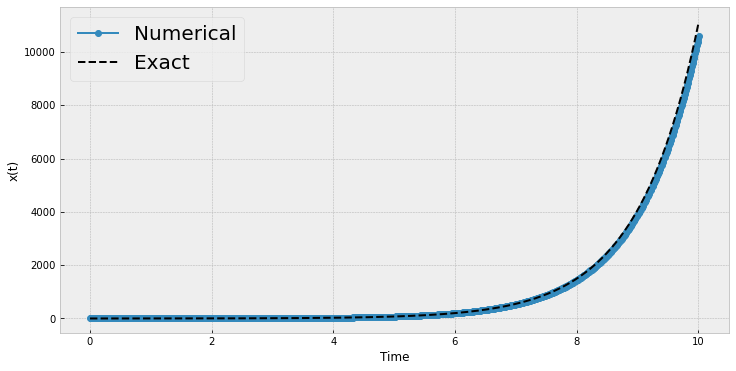

In [20]:
def f(x, t):
    return x

# Initial conditions
x    = 1/2
t    = 0
Tmax = 10
# Timestep
h    = 0.01

# Keep list of trajectories and times for plotting
Xs = [x]
Ts = [t]
while t < Tmax:
    # At each step, use derivative at that position
    x = x + h*f(x, t)
    # Increment time
    t += h
    # Store time and position
    Ts.append(t)
    Xs.append(x)

fig = plt.figure(figsize = (12,6))

# Plot numerical solution
plt.plot(Ts, Xs, marker = 'o', label = 'Numerical')

# Plot analytic solution
x0 = Xs[0]
# Define an array of times at high resolution
ts = np.linspace(Ts[0], Ts[-1], 1000)
plt.plot(ts, x0*np.exp(ts), '--', c = 'k', label = 'Exact')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend(loc = 'upper left', fontsize = 20)

# Example 2 - Better coding practice
## and also comparison between Forward Euler and 4th-order Runge-Kutta

* Implement integrator to take f as an argument
* Use consistent call signature for f
* Make a function that will take f and an integrator, and step forward in time until Tmax

* Also: Try modifying the timestep, and note how much faster the 4th-order Runge-Kutta converges compared to the 1st-order Euler method

## 4th-order Runge-Kutta

![graph](fig/IMG_0511.png)

In [8]:
#####################
#### Integrators ####
#####################

# The forward Euler method
def euler(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x, t) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,           t)
    # Update time and position
    x_  = x + h*k1
    return x_

# Heun's Method
def rk2(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,          t)
    k2  = f(x + k1*h,   t + h)
    # Update time and position
    x_ = x + h*(k1 + k2)/2
    return x_

# Kutta's method
def rk3(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,                 t)
    k2  = f(x + k1*h/2,        t + h/2)
    k3  = f(x - k1*h + 2*k2*h, t + h)
    # Update time and position
    x_  = x + h*(k1 + 4*k2 + k3)/6
    return x_

# 4th-order Runge-Kutta
def rk4(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,          t)
    k2  = f(x + k1*h/2, t + h/2)
    k3  = f(x + k2*h/2, t + h/2)
    k4  = f(x + k3*h,   t + h)
    # Update time and position
    x_  = x + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x_

In [9]:
###########################
#### Utility functions ####
###########################

def trajectory(X0, T0, Tmax, h, f, integrator):
    # Number of timesteps
    Nt   = int((Tmax) / h)
    # Add 2 for initial position and fractional step at end
    # X0.size lets X hold Nt+2 arrays of the same size as X0
    X0   = np.array(X0)
    X    = np.zeros((Nt+2, X0.size))
    T    = np.zeros(Nt+2)
    # Initialise
    X[0,:] = X0
    T[0]   = T0
    # Loop over timesteps
    t = T0
    for i in range(Nt+1):
        # Make sure the last step stops exactly at Tmax
        h  = min(h, Tmax - t)
        # Calculate next position
        X[i+1,:] = integrator(X[i,:], t, h, f)
        T[i+1] = T[i] + h
        # Increment time
        t += h
    return X, T

Time to run Euler:  0.0008828639984130859
Time to run 4th-order Runge-Kutta:  0.0018718242645263672


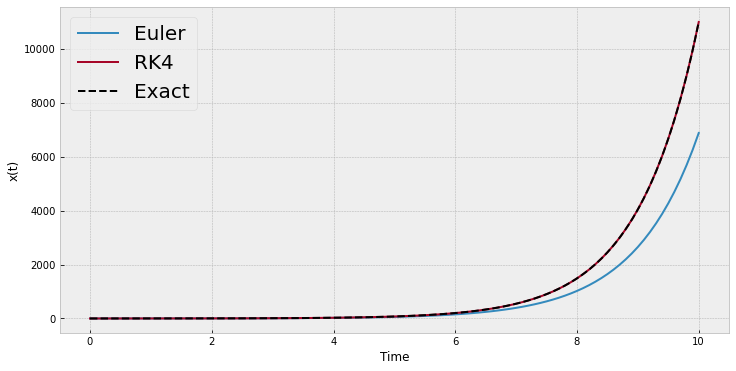

In [21]:
def f(x, t):
    return x

# Initial conditions
x0   = 1/2
t0   = 0
Tmax = 10
# Timestep
h    = 0.1

# The integrators and the function trajectory are implemented
# at the top of the notebook

tic = time()
X_euler, Ts = trajectory(x0, t0, Tmax, h, f, euler)
toc = time()
print('Time to run Euler: ', toc - tic)

tic = time()
X_rk4, Ts   = trajectory(x0, t0, Tmax, h, f, rk4)
toc = time()
print('Time to run 4th-order Runge-Kutta: ', toc - tic)

# Make a figure
fig = plt.figure(figsize = (12,6))

# Plot numerical solutions
plt.plot(Ts, X_euler, label = 'Euler')
plt.plot(Ts, X_rk4, label = 'RK4')

# Plot analytic solution
# Define an array of times at high resolution
ts = np.linspace(Ts[0], Ts[-1], 1000)
x0 = Xs[0]
plt.plot(ts, x0*np.exp(ts), '--', c = 'k', label = 'Exact')

# Labels
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend(loc = 'upper left', fontsize = 20)

# Example 3 - Error as function of timestep

To look at error as a function of timestep:
* Calculate trajectory for many different timesteps
* Calculate error as $x(t_N) - x_N$, where $N$ is the total number of timesteps and $x(t_N)$ is the exact solution at $t_N$.
* Plot on log-log scale, and add straight lines proportiona to $h$ and $h^4$ to compare slope
* The reason the error doesn't get smaller than about $10^{-12}$ in this case is due to limited precision in floating point numbers, and the large number of steps for the shorter timesteps

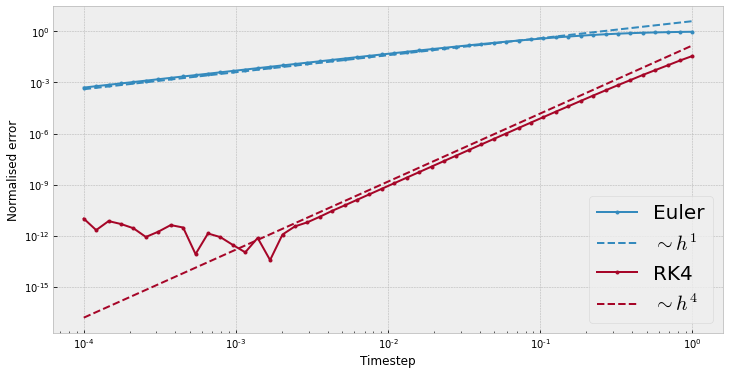

In [22]:
def f(x, t):
    return x

# Initial conditions
x0   = 1/2
t0   = 0
Tmax = 10

# Define Nh logarithmically spaced timesteps from 0.0001 to 1
Nh = 50
timesteps = np.logspace(-4, 0, Nh)

# For each of those timesteps, calculate the endpoint of the trajectory
Xe_euler = np.zeros(Nh)
Xe_rk4   = np.zeros(Nh)
for i, h in enumerate(timesteps):
    Xs, Ts = trajectory(x0, t0, Tmax, h, f, euler )
    Xe_euler[i] = Xs[-1]
    Xs, Ts = trajectory(x0, t0, Tmax, h, f, rk4   )
    Xe_rk4[i]   = Xs[-1]

    
# Analytic solution
Xact = x0*np.exp(Tmax)
# Calculate error, normalised by exact solution
err_euler = np.abs(Xe_euler - Xact) / Xact
err_rk4   = np.abs(Xe_rk4   - Xact) / Xact

fig = plt.figure(figsize = (12,6))
# Plot error as function of timesteps
# And plot straight lines to show slope
l, = plt.plot(timesteps, err_euler, marker = '.', label = 'Euler')
plt.plot(timesteps, 4.0*timesteps**1, '--', c = l.get_color(), label = '$\sim h^1$')
l, = plt.plot(timesteps, err_rk4,   marker = '.', label = 'RK4')
plt.plot(timesteps, 0.15*timesteps**4, '--', c = l.get_color(), label = '$\sim h^4$')

plt.legend(loc = 'lower right', fontsize = 20)
plt.xlabel('Timestep')
plt.ylabel('Normalised error')

# Logscale
plt.xscale('log')
plt.yscale('log')

# Note that the error reaches a minimum, and then starts growing
# when the timestep is decreased further. This is due to accumulation
# of round-off error:
# https://en.wikipedia.org/wiki/Round-off_error#Accumulation_of_roundoff_error

# Example 4 - Restricted three-body problem

This example is taken from _Solving Ordinary Differential Equations, vol I_ by Hairer, Nørsett and Wanner, beginning of Chapter II. You can download the book as a free pdf from Springer if you are on the NTNU network:

http://link.springer.com/book/10.1007%2F978-3-540-78862-1

The system is the gravitational three-body problem, for a system made up of the Earth, the Moon and a spacecraft, and with the simplification that the motion of the Earth and Moon are unaffected by the spacecraft (which seems reasonable). The equations are given in dimensionless form.

The equations are given as second order equations for the two components of the position vector:

$$ \ddot{y_1} = y_1 + 2\dot{y_2} - \mu' \frac{y_1 + \mu}{D_1} - \mu\frac{y_1 - \mu'}{D_2}$$
$$ \ddot{y_2} = y_2 + 2\dot{y_1} - \mu' \frac{y_2}{D_1} - \mu\frac{y_1}{D_2}$$
$$ D_1 = \left( (y_1 + \mu)^2 + y_2^2\right)^{3/2} $$
$$ D_1 = \left( (y_1 - \mu')^2 + y_2^2\right)^{3/2} $$
$$ \mu = 0.012277471 $$
$$ \mu' = 1 - \mu. $$

With the initial conditions
$$ y_1(0) = 0.994 $$
$$ \dot{y_1}(0) = 0 $$
$$ y_2(0) = 0 $$
$$ \dot{y_2}(0) = -2.00158520637908252240537862224, $$

these equations will exhibit a periodic solution with period

$$ T = 17.0652165601579625588917206249. $$

The point of the example is that the trajectory changes quickly close to the Moon, and less quickly elsewhere. However, since we must choose the timestep short enough to capture the dynamics close to the Moon, we  are forced to use an excessively short timestep for the rest of the orbit as well, unless we use a method with adaptive timestep.

Below, we first define the function `fa(x, t)` which implements the above equations, rewritten into a system of four first-order ODEs. We then integrate the trajectories using the 4th-order Runge-Kutta method, before moving on to variable timestep methods.

Number of steps:  68262
Simulation took  2.8565452098846436  seconds


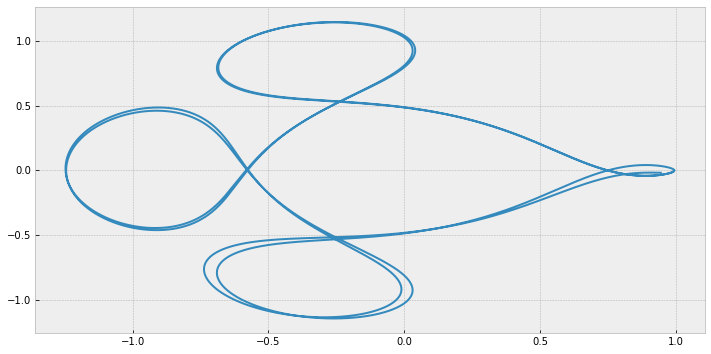

In [23]:
def fa(X, t):
    # Example taken from beginning of Chapter II in
    # Hairer, Nørsett, Wanner
    # Solving Ordinary Differential Equations, vol I
    # X[0] = y1
    # X[1] = y1dot
    # X[2] = y2
    # X[3] = y2dot
    # Constants
    mu  = 0.012277471
    mu_ = 1 - mu
    # Variable parameters
    D1 = ((X[0] + mu )**2 + X[2]**2)**(3/2)
    D2 = ((X[0] - mu_)**2 + X[2]**2)**(3/2)
    # Derivatives
    dX0 = X[1]
    dX1 = X[0] + 2*X[3] - mu_*(X[0] + mu)/D1 - mu*(X[0] - mu_)/D2
    dX2 = X[3]
    dX3 = X[2] - 2*X[1] - mu_*X[2]/D1        - mu*X[2]/D2
    return np.array([dX0, dX1, dX2, dX3])
    
    
t  = 0
T  = 17.06521656015796
X0 = np.array([
         0.994, # y1(0)
         0.0,   # y1'(0)
         0.0,   # y2(0)
        -2.001585106379082522405 # y2'(0)
    ])


# Intergrate for a duration equal to 2T.
# If the error after the first orbit is too large,
# the second orbit will be completely off.
# Try experimenting with the timestep.
h  = 5e-4

# Also, measure the time of the calculation
tic = time()
Xs, Ts = trajectory(X0, t, 2*T, h, fa, rk4)
toc = time()
print('Number of steps: ', len(Ts))
print('Simulation took ', toc - tic, ' seconds')

fig = plt.figure(figsize = (12, 6))
plt.plot(Xs[:,0], Xs[:,2])

# Example 5 - Variable timestep

Below is an example of a very straightforward implementation of a variable timestep code. It makes two estimates of the next position, compares the two, and assumes that the error is related to the difference. If the difference is small, the timestep is probably short enough, if the difference is large, we should reduce the timestep.

A more advanced implementation is shown further down.

In [24]:
#######################################
#### Variable stepsize integrators ####
#######################################

def rk43(x, t, h, f, atol = 1e-4, rtol = 1e-4):
    # Calculate 3rd and 4th order prediction
    x3 = rk3(x, t, h, f)
    x4 = rk4(x, t, h, f)
    # Error is related to difference between x3 and x4
    # Choosing here to use norm of difference divided by norm of x4
    # Other measures of error exists
    # rtol is relative tolerance
    # atol is absolute tolerance
    sc  = rtol*np.sum(np.sqrt(x4**2)) + atol
    err = np.sum(np.sqrt((x3 - x4)**2)) / sc
    if err < 1:
        # Step is accepted
        # Use 4th order as next position and update time
        x_ = x4
        t_ = t + h
        # Try increasing timestep a bit
        h_ = 1.5*h
    else:
        # Step is rejected
        # Do not update time and position
        x_ = x
        t_ = t
        # Try decreasing timestep a bit
        h_ = 0.5*h
    return x_, t_, h_


#############################################
#### Function for calculating trajectory ####
#############################################

def variable_step_trajectory(X0, T0, Tmax, h, f, integrator, tol = 1e-3):
    # In this case, number of steps is not known beforehand.
    # If we want to plot the trajectory, there are two simple options:
    # 1: Specify an output timestep, and store that often
    # 2: Store all steps in a list that grows 
    # We'll go for 2, since that allows us to visualise the steplengths,
    X = [X0]
    T = [0.0]
    t = 0
    rejected = 0
    while t < Tmax:
        # Make sure last step doesn't take us past Tmax
        h  = min(h, Tmax - t)
        # Integrator now returns not only x, but also h and t
        # Overwrite h, but store x_ and t_ in temporary variables
        x_, t_, h = integrator(X[-1], t, h, f, atol = tol, rtol = tol)
        # Only store x_ if step was accepted (in which case t_ > t)
        if t_ > t:
            X.append(x_)
            T.append(t_)
            t = t_
        else:
            rejected += 1
    # Now we must return t as well, since h is variable
    # Convert to array before returning
    return np.array(X), np.array(T), rejected

Number of steps:  993
Simulation took  0.14336800575256348  seconds
Number of rejected steps:  578


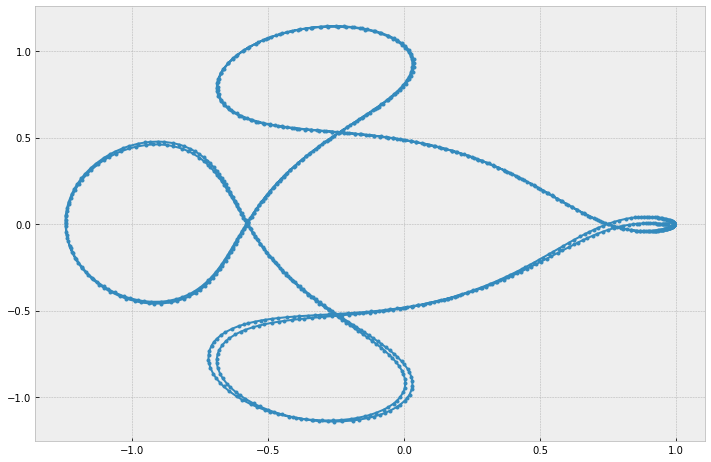

In [25]:
t  = 0
T  = 17.06521656015796
X0 = np.array([
         0.994, # y1(0)
         0.0,   # y1'(0)
         0.0,   # y2(0)a
        -2.001585106379082522405 # y2'(0)
    ])


# Starting timestep
h0 = 1e-3
# Again integrating two orbits. Compare number of steps to R-K 4 above.
tic = time()
Xs, Ts, R = variable_step_trajectory(X0, t, 2*T, h0, fa, rk43, tol = 2e-6)
toc = time()
print('Number of steps: ', len(Ts))
print('Simulation took ', toc - tic, ' seconds')
print('Number of rejected steps: ', R)

fig = plt.figure(figsize = (12, 8))
plt.plot(Xs[:,0], Xs[:,2], marker = '.')

Text(0.5, 0, 'Time')

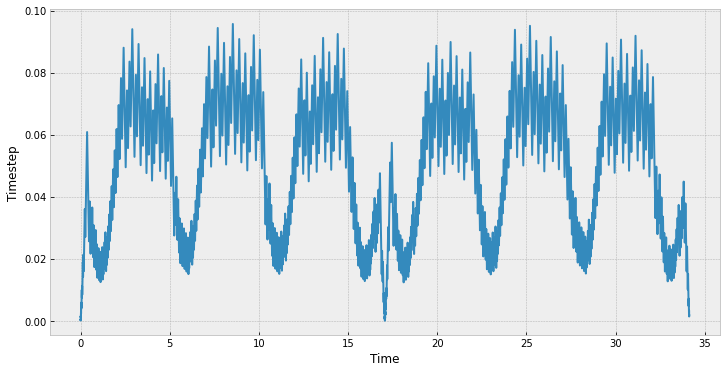

In [10]:
# Plot steplengths as function of time
hs = Ts[1:] - Ts[:-1]

fig = plt.figure(figsize = (12, 6))
plt.plot(Ts[1:], hs)
plt.ylabel('Timestep')
plt.xlabel('Time')

# Example 6 - Dormand and Prince 5(4)

This example includes an implementation of the Dormand-Prince method, which is a method that makes one 5th-order and one 4th-order prediction of the next step, using only 7 evaluations of $f(x,t)$, and uses the 5th-order prediction as the estimate of the next point.

Stepsize control is based on a recipe from _Solving Ordinary Differential Equations, vol I_ by Hairer, Nørsett and Wanner, page 167-168 (see link further up). It uses the error and the current timestep to calculate the optimal timestep, i.e., the timestep that would produce an error exactly matching the tolerance. It then sets the sets the timestep a little smaller than this. The result is a quite efficient method where fewer steps are rejected than the simpler approach above.

In [26]:
def dopri5(x, t, h, f, atol = 1e-6, rtol = 1e-6):
    # x and t are coordinates
    # h is timestep
    # f(t, x) is a function that returns the derivative
    
    # Nodes
    c1  =  0
    c2  =  1./5.
    c3  =  3./10.
    c4  =  4./5.
    c5  =  8./9.
    c6  =  1.
    c7  =  1.
    # Matrix elements
    a21 =  1./5.
    a31 =  3./40.
    a32 =  9./40.
    a41 =  44./45.
    a42 = -56./15.
    a43 =  32./9.
    a51 =  19372./6561.
    a52 = -25360./2187.
    a53 =  64448./6561.
    a54 = -212./729.
    a61 =  9017./3168.
    a62 = -355./33.
    a63 =  46732./5247.
    a64 =  49./176.
    a65 = -5103./18656.
    a71 =  35./384.
    a72 =  0.
    a73 =  500./1113.
    a74 =  125./192.
    a75 = -2187./6784.
    a76 =  11./84.
    # Fourth order weights
    b41 =  5179./57600.
    b42 =  0.
    b43 =  7571./16695.
    b44 =  393./640.
    b45 = -92097./339200.
    b46 =  187./2100.
    b47 =  1./40.
    # Fifth order weights
    b51 =  35./384.
    b52 =  0.
    b53 =  500./1113.
    b54 =  125./192.
    b55 = -2187./6784.
    b56 =  11./84.
    b57 =  0.
    
    # "Slopes"
    k1  = f( x,                                                                   t + c1*h )
    k2  = f( x + a21*h*k1,                                                        t + c2*h )
    k3  = f( x + a31*h*k1 + a32*h*k2,                                             t + c3*h )
    k4  = f( x + a41*h*k1 + a42*h*k2 + a43*h*k3,                                  t + c4*h )
    k5  = f( x + a51*h*k1 + a52*h*k2 + a53*h*k3 + a54*h*k4,                       t + c5*h )
    k6  = f( x + a61*h*k1 + a62*h*k2 + a63*h*k3 + a64*h*k4 + a65*h*k5,            t + c6*h )
    k7  = f( x + a71*h*k1 + a72*h*k2 + a73*h*k3 + a74*h*k4 + a75*h*k5 + a76*h*k6, t + c7*h )

    # Calculate fourth and fifth order prediction of new point
    x4  = x + h*(k1*b41 + k2*b42 + k3*b43 + k4*b44 + k5*b45 + k6*b46 + k7*b47)
    x5  = x + h*(k1*b51 + k2*b52 + k3*b53 + k4*b54 + k5*b55 + k6*b56 + k7*b57)
    
    # Implementing error checking and variable stepsize roughly as in
    # Hairer, Nørsett and Wanner:
    # Solving ordinary differential equations I -- Nonstiff problems
    # pages 167 and 168 in the 2008 printing

    # these are 4th and 5th order methods, q = min(4, 5)
    q   = 4.
    sc  = np.maximum(np.abs(x4), np.abs(x5)) * rtol + atol
    err = np.amax(np.sqrt(((x4 - x5) / sc)**2))
    # parameters limiting change in timestep
    fac    = 0.8
    maxfac = 2.5
    # Calculating optimal h
    # If err happens to be 0 (can happen, depending on problem)
    # then hopt = Infinity. Set some lower limit.
    if err < 1e-21:
        err = 1e-21
    h_opt = h * (1./err) ** (1./(q+1.))
    if err <= 1.0:
        # Step is accepted:
        # Use fifth order result as next position
        x_ = x5
        t_ = t + h
        # Increase steplength somewhat less than predicted, to
        # make it likely the next step is accepted
        h_ = min(maxfac * h, fac * h_opt)
    else:
        # Step is rejected:
        # Position and time is not updated
        x_ = x
        t_ = t
        # Decrease steplength
        h_   = fac * h_opt
    return x_, t_, h_

Number of steps:  261
Simulation took  0.04039621353149414  seconds
Number of rejected steps:  23


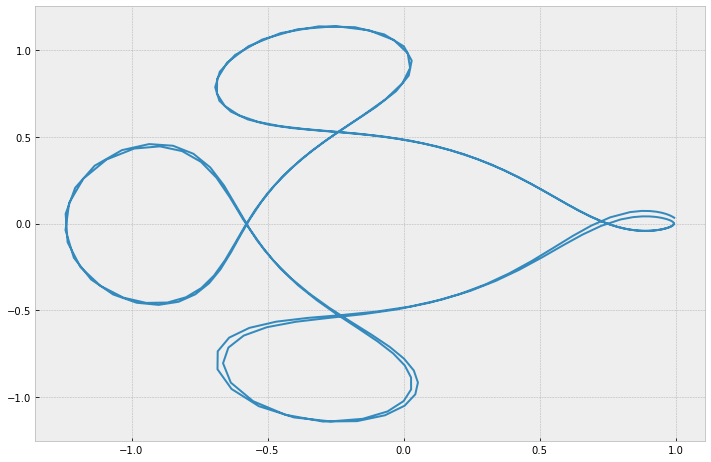

In [27]:
t  = 0
T  = 17.06521656015796
X0 = np.array([
         0.994, # y1(0)
         0.0,   # y1'(0)
         0.0,   # y2(0)a
        -2.001585106379082522405 # y2'(0)
    ])

# Starting timestep
h0 = 1e-3
# Again integrating two orbits. Compare number of steps to R-K 4 above.
tic = time()
Xs, Ts, R = variable_step_trajectory(X0, t, 2*T, h0, fa, dopri5, tol = 2.5e-6)
toc = time()
print('Number of steps: ', len(Ts))
print('Simulation took ', toc - tic, ' seconds')
print('Number of rejected steps: ', R)


fig = plt.figure(figsize = (12, 8))
# Include markers a each point to illustrate stepsize
plt.plot(Xs[:,0], Xs[:,2])#, marker = '.')

Text(0.5, 0, 'Time')

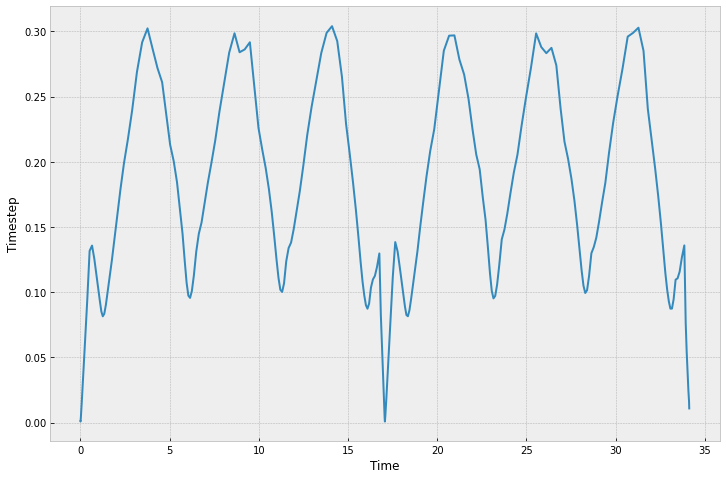

In [13]:
# Plot steplengths as function of time
hs = Ts[1:] - Ts[:-1]

fig = plt.figure(figsize = (12, 8))
plt.plot(Ts[1:], hs)
plt.ylabel('Timestep')
plt.xlabel('Time')

# Example 7 - Stiff equations

The idea here is to compare two equations that predict almost exactly equal trajectories, but with very different numerical properties.

Consider first an equation that discribes a trajectory moving towards $x=0$, with speed proportional to the distance:

$$\dot{x} = v(x),$$
where
$$v(x) = -x.$$

Consider next an equation that discribes a trajectory that experiences acceleration if the speed deviates from $v(x)$, proportional to the difference:

$$\ddot{x} = \alpha (v(x) - \dot{x}) $$

again with
$$v(x) = -x.$$

The physical interpretation can be in the first case a particle that moves with the velocity given by $v(x)$, and in the second case of a particle that experiences a force, which will tend to make it move with the velocity given by $v(x)$. In this case, $\alpha$ plays the role of a coupling coefficient.

If $\alpha$ is small, the second trajectory will oscillate towards $x=0$, if $\alpha$ is large, the second trajectory will almost immediately reach the velocity given by $v(x)$, and thereafter decay exponentially towards $x=0$, just like in the first case.

Below, we have implemented the two cases as different functions, `f1(x, t)` and `f2(x, t)`, and we integrate the trajectories and compare the behaviour.

Things to note:
* Initially, f2 is integrated with a much shorter timestep than f1, and the trajectories look identical.
* Try increasing the timestep of f2, and explain what happens
* The reason we need a shorter timestep for f2 is because the acceleration happens quickly, and we need to resolve the acceleration to get the velocity and position right, even if we are really only interested in the position.

A system of equation such as case 2, where we need a timestep that is much much shorter than the timescale at which we are interested in the dynamics, is an example of a _stiff_ system of equations.

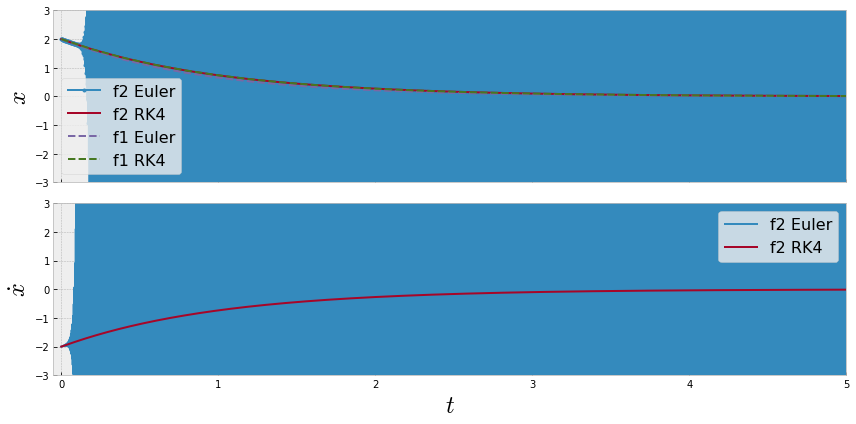

In [30]:
def v(x):
    return -x

def f1(x, t):
    return v(x)

def f2(X, t):
    # x[0] = x
    # x[1] = xdot
    alpha = 1e3
    dX = np.zeros(2)
    dX[0] = X[1]
    dX[1] = alpha*(v(X[0]) - X[1])
    return dX

# Common time variables
t0   = 0
Tmax = 5

# Initial conditions for f1
x01  = 2
# Timestep
h1    = 0.2
# Calculate trajectories
X1_euler, T1s = trajectory(x01, t0, Tmax, h1, f1, euler)
X1_rk4, T1s   = trajectory(x01, t0, Tmax, h1, f1, rk4)


# Initial conditions for f2, note that in this case
# we also need an initial value for the velocity
x02 = np.array([2, -2])
# Timestep
# Try also with h2 = 0.002009
h2 = 0.0022
# Calculate trajectories
X2_euler, T2s = trajectory(x02, t0, Tmax, h2, f2, euler)
X2_rk4, T2s   = trajectory(x02, t0, Tmax, h2, f2, rk4)

# Make a figure with two subplots
fig, ax = plt.subplots(nrows = 2, sharex = True, figsize = (12,6))

# Plot numerical solutions of position
ax[0].plot(T2s, X2_euler[:,0], marker = '.', label = 'f2 Euler')
ax[0].plot(T2s, X2_rk4[:,0], label = 'f2 RK4')

# Plot numerical solutions of position
ax[0].plot(T1s, X1_euler, '--', label = 'f1 Euler')
ax[0].plot(T1s, X1_rk4, '--', label = 'f1 RK4')

# Plot numerical solutions of velocity (f2 only)
ax[1].plot(T2s, X2_euler[:,1], label = 'f2 Euler')
ax[1].plot(T2s, X2_rk4[:,1], label = 'f2 RK4')

# Labels
ax[0].set_ylabel('$x$', fontsize = 24)
ax[1].set_ylabel('$\dot{x}$', fontsize = 24)
ax[1].set_xlabel('$t$', fontsize = 24)
# Add legend
ax[0].legend(fontsize = 16)
ax[1].legend(fontsize = 16)
# Plot limits
ax[0].set_ylim(-3, 3)
ax[1].set_ylim(-3, 3)
ax[1].set_xlim(-0.05, 5)
# Reduce whitespace
plt.tight_layout()

# Example 8 - Implicit solvers

For stiff equations, the best solution is often to use an implicit solver. In practice, the most common approach is to use a numerical library (see the scipy example below), but we illustrate the principle here, using the implicit Euler method.

Recall that the forward Euler method was

$$ x_{n+1} = x_n + h\cdot f(x_n, t_n).$$

The implicit Euler method (also known as backward Euler) is instead

$$ x_{n+1} = x_n + h\cdot f(x_{n+1}, t_{n+1}).$$

The problem then is of course that $x_{n+1}$ is unknown, and we have to solve an equation to find it. Methods of this kind are known as implicit methods, since $x_{n+1}$ is given implicitly, instead of explicitly. In general, some kind of numerical equation solver is used to find $x_{n+1}$.

In simple cases, such as the above example, we can solve the equation analytically. We have the second order ODE

$$\ddot{x} = \alpha (v(x) - \dot{x}).$$

We use the substitutions $x = x_1$, $\dot{x} = x_2$ to rewrite into a system of two first-order ODEs:

$$\dot{x_1} = x_2,$$
$$\dot{x_2} = \alpha \big(v(x_1) - x_2\big).$$

Inserting into the implicit Euler scheme, we find

$$ x_{1_{n+1}}  = x_{1_n} + h \cdot x_{2_{n+1}}, $$
$$ x_{2_{n+1}}  = x_{2_n} + h \cdot \alpha \big(v(x_{1_{n+1}}) - x_{2_{n+1}}\big).$$

This is a system of equations with two unknowns. Using that $v(x) = -x$, we can solve this system to find

$$ x_{1_{n+1}}  = x_{1_n} + h \cdot \frac{x_{2_n} - \alpha h x_{1_n}}{1 + \alpha h + \alpha h^2}, $$
$$ x_{2_{n+1}}  = \frac{x_{2_n} - \alpha h x_{1_n}}{1 + \alpha h + \alpha h^2}.$$


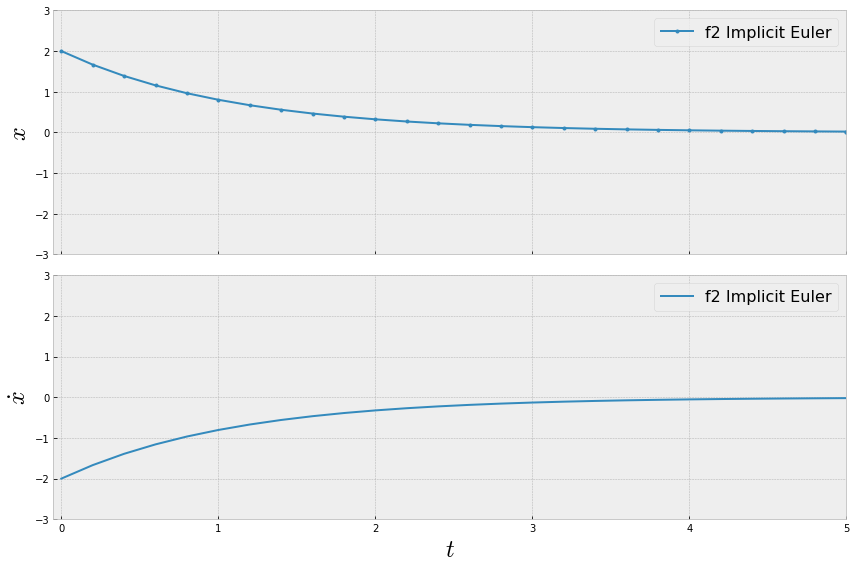

In [31]:
# Implementing the above equations in an implicit scheme
# Note that we are writing this method specifically for
# the problem we are looking at here. It does not work
# for other problems.

def implicit_euler(X, t, h, f):
    # The f isn't used for anything, but keeping
    # the call signature consistent allows us to
    # re-use the earlier trajectory function.
    alpha = 1e3
    x1 = X[0] + h*(X[1]-alpha*h*X[0]) / (1 + alpha*h + alpha*h**2)
    x2 = (X[1]-alpha*h*X[0]) / (1 + alpha*h + alpha*h**2)
    return np.array([x1, x2])


# Initial conditions for f2
x02 = np.array([2, -2])
# Timestep
# Note that the timestep can be orders of magnitude larger
# than what we found above for the explicit schemes.
h2 = 0.2
# Calculate trajectories
X2s, T2s = trajectory(x02, t0, Tmax, h2, f2, implicit_euler)

# Make a figure with two subplots
fig, ax = plt.subplots(nrows = 2, sharex = True, figsize = (12,8))

# Plot numerical solutions of position
ax[0].plot(T2s, X2s[:,0], marker = '.', label = 'f2 Implicit Euler')

# Plot numerical solutions of velocity
ax[1].plot(T2s, X2s[:,1], label = 'f2 Implicit Euler')

# Labels
ax[0].set_ylabel('$x$', fontsize = 24)
ax[1].set_ylabel('$\dot{x}$', fontsize = 24)
ax[1].set_xlabel('$t$', fontsize = 24)
# Add legend
ax[0].legend(fontsize = 16)
ax[1].legend(fontsize = 16)
# Plot limits
ax[0].set_ylim(-3, 3)
ax[1].set_ylim(-3, 3)
ax[1].set_xlim(-0.05, 5)
# Reduce whitespace
plt.tight_layout()

# Example 9 - Dense output

ODE integrators produce solutions for $x(t)$ only at a set of discrete points, $t_n = t_0 + n h$ (or, $t_n = t_0 + \sum_{i=0}^{n-1} h_i$ for variable-step integrators). If you need the results at specific points in time, you essentially have two options:
* Adjust the timestep to give results at the times you need.
* Interpolate the solution to the points you need.

ODE methods that provide an easy (and accurate) way to interpolate the solution to any desired time are said to provide "dense output". It can often be more efficient to use a dense output scheme than to run with a small timestep. This is especially true for variable-step integrators, which are efficient precisely because they are allowed to adjust the timestep during the calculation.


## Hermite interpolation

At any time $t_n$, where the solution, $x_n$, is given, we also have the derivative of the solution, which by the definition of the ODE is $f(x_n, t_n)$. When we have a curve on an interval $[t_n, t_{n+1}]$, and we know both the value of the curve, and it's derivative, at both endpoints, we can use cubic Hermite interpoloation to find a value anywhere on the interval. See p. 916 in Numerical Recipes (3rd ed.) for details.

Let $\theta \in [0, 1]$, such that the time for which the result is desired is $t = t_n + \theta h$. Then, the interpolant giving the solution on the interval $[t_n, t_{n+1}]$ is

$$ x(t) = (1-\theta)x_n + \theta x_{n+1} + \theta(\theta - 1)\big[(1-2\theta)(x_{n+1} - x_n) + (\theta - 1)h f(x_n, t_n) + \theta h f(x_{n+1}, t_{n+1})\big]. $$

Note that any ODE method will evaluate $f(x_n, t_n)$ as part of finding the solution at the next time $t_{n+1}$, hence both the function and it's deravitive will already be available without any extra evaluations of $f(x, t)$.

Below is an example implementing dense output with cubic Hermite interpolation and RK4.

In [32]:
# Heun's Method
def rk2_dense(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,          t)
    k2  = f(x + k1*h,   t + h)
    # Update time and position
    x_ = x + h*(k1 + k2)/2
    # Return both k1 and the new position, x_
    # for use with dense output.
    # Note: k1 is the derivative in the current point, x,
    # not in the next point, x_
    return x_, k1

# Kutta's method
def rk3_dense(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,                 t)
    k2  = f(x + k1*h/2,        t + h/2)
    k3  = f(x - k1*h + 2*k2*h, t + h)
    # Update time and position
    x_  = x + h*(k1 + 4*k2 + k3)/6
    # Return both k1 and the new position, x_
    # for use with dense output.
    # Note: k1 is the derivative in the current point, x,
    # not in the next point, x_
    return x_, k1

# 4th-order Runge-Kutta
def rk4_dense(x, t, h, f):
    # x is coordinates (as a vector)
    # h is timestep
    # f(x) is a function that returns the derivative
    # "Slopes"
    k1  = f(x,          t)
    k2  = f(x + k1*h/2, t + h/2)
    k3  = f(x + k2*h/2, t + h/2)
    k4  = f(x + k3*h,   t + h)
    # Update time and position
    x_  = x + h*(k1 + 2*k2 + 2*k3 + k4)/6
    # Return both k1 and the new position, x_
    # for use with dense output.
    # Note: k1 is the derivative in the current point, x,
    # not in the next point, x_
    return x_, k1

def hermite(X, K, T, output_times):
    # For all times in output_times, find
    # the largest time in T, smaller that the output time
    # (i below is an array, with one index for each of the times
    # in the array output_times)
    i = np.searchsorted(T, output_times, side = 'right') - 1
    # Handle last point
    if i[-1] == len(T)-1:
        if T[-2] == T[-1]:
            i[-1] = len(T)-3
        else:
            i[-1] = len(T)-2
    # Calculate timesteps (not necessarily constant)
    h = (T[i + 1] - T[i])
    # Calculate theta, which are numbers in [0, 1] indicating position
    # within each interval
    theta = (output_times - T[i]) / h
    # Assign arrays with values of X and K and times i and i+1,
    # and flatten those arrays (otherwise they get shape (N, 1) which
    # in turn messes up the later expressions and produces arrays of shape
    # (N, N) instead of just N)
    Xi = X[i].flatten()
    Xip1 = X[i+1].flatten()
    Ki = K[i].flatten()
    Kip1 = K[i+1].flatten()
    X_dense = (1-theta)*Xi + theta*Xip1 + theta*(theta-1)*((1-2*theta)*(Xip1-Xi) + (theta-1)*h*Ki + theta*h*Kip1)
    return X_dense

def dense_trajectory(X0, T0, Tmax, h, f, integrator, output_times = None):
    # This function will return output at the times
    # given in the array output_times, using Hermite interpolation
    # to provide dense output.
    # Number of timesteps
    Nt   = int((Tmax) / h)
    # Add 2 for initial position and fractional step at end
    # X0.size lets X hold Nt+2 arrays of the same size as X0
    # Add an extra array to hold the derivatives, f(x_n, t_n)
    # for use with dense output (Hermite interpolation)
    X0   = np.array(X0)
    X    = np.zeros((Nt+2, X0.size))
    K    = np.zeros((Nt+2, X0.size))
    T    = np.zeros(Nt+2)
    # Initialise
    X[0,:] = X0
    T[0]   = T0
    # Loop over timesteps
    t = T0
    for i in range(Nt+1):
        # Make sure the last step stops exactly at Tmax
        h  = min(h, Tmax - t)
        # Calculate next position (x+1),
        # and store derivative at current position (i)
        X[i+1,:], K[i,:] = integrator(X[i,:], t, h, f)
        T[i+1] = T[i] + h
        # Increment time
        t += h
    # After integration is done, interpolate to required points
    # First, obtain the derivative at the very last point
    K[-1,:] = f(X[-1], T[-1])
    # Then interpolate
    if output_times is not None:
        X_dense = hermite(X, K, T, output_times)
    else:
        X_dense = []
    return X, T, X_dense

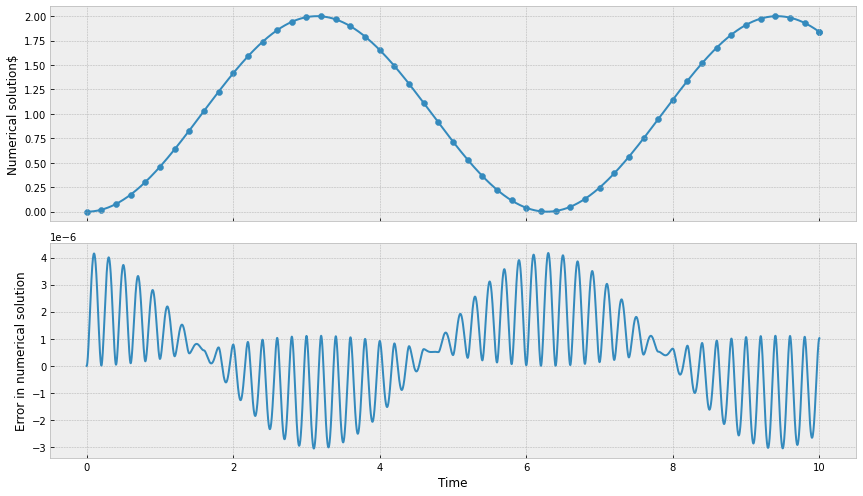

In [36]:
def f(x, t):
    return np.sin(t)

def exact(t):
    return 1 - np.cos(t)

Tmax = 10
h = 0.2
X0 = 0
T0 = 0

output_times = np.linspace(0, Tmax, 10000)
X, T, X_dense = dense_trajectory(X0, T0, Tmax, h, f, rk4_dense, output_times = output_times)

fig, ax = plt.subplots(nrows = 2, figsize = (12, 7), sharex = True)
ax[0].scatter(T, X)
ax[0].plot(output_times, X_dense)
ax[0].set_ylabel('Numerical solution$')


ax[1].plot(output_times, X_dense - exact(output_times))
ax[1].set_ylabel('Error in numerical solution')
ax[1].set_xlabel('Time')
plt.tight_layout()

### Compare timing of dense output vs. small timestep

In [37]:
Tmax = 10
h = 0.2
output_times = np.linspace(0, Tmax, 10000)

# Measure the time to do integration with h = 0.2 (corresponding to 50 points)
# and providing dense output at 10000 points
%timeit X, T, X_dense = dense_trajectory(X0, T0, Tmax, h, f, rk4_dense, output_times = output_times)

Tmax = 10
h = 0.001
# Measure the time to do integration with h = 0.001 (corresponding to 10000 points)
# with no dense output
%timeit X, T, X_dense = dense_trajectory(X0, T0, Tmax, h, f, rk4_dense)

982 µs ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
103 ms ± 846 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Investigate convergence of dense output

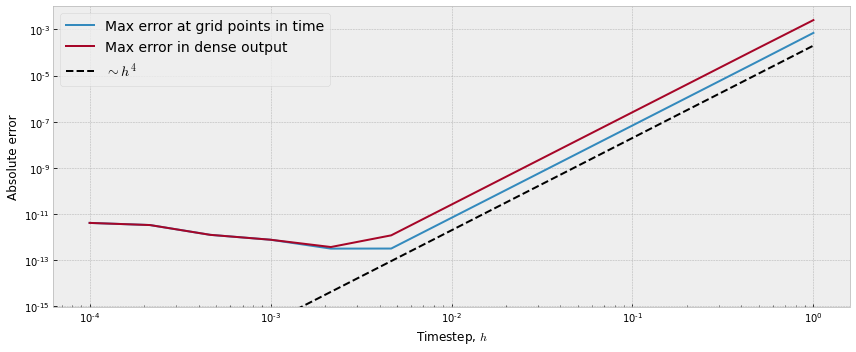

In [38]:
Tmax = 10
output_times = np.linspace(0, Tmax, 1000000)

timesteps = np.logspace(-4, 0, 13)
errors = np.zeros_like(timesteps)
errors_dense = np.zeros_like(timesteps)

fig = plt.figure(figsize = (12, 5))
for i, h in enumerate(timesteps):
    X, T, X_dense = dense_trajectory(X0, T0, Tmax, h, f, rk4_dense, output_times = output_times)
    # Find maximal error at grid points, T
    errors[i] = np.amax(np.abs(X.flatten() - exact(T)))
    # Find maximal error among dense output points
    errors_dense[i] = np.amax(np.abs(X_dense - exact(output_times)))
    
plt.plot(timesteps, errors, label = 'Max error at grid points in time')
plt.plot(timesteps, errors_dense, label = 'Max error in dense output')
plt.plot(timesteps, 2e-4*timesteps**4, '--', c = 'k', label = '$\sim h^4$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-15, 1e-2)
plt.legend(fontsize = 14)
plt.xlabel('Timestep, $h$')
plt.ylabel('Absolute error')
plt.tight_layout()

# Example 10 - Symplectic integrators

For some problems, you want the integrator to respect some kind of symmetry or conserved property. An example would be a gravitational system, where energy is conserved. If you integrate a gravitational system with, e.g., 4th-order Runge-Kutta, then the conservation of energy will improve when the timestep is smaller, but it is also possible to find integrators that exactly conserve energy (up to the limitations given by finite precision numbers on the computer) even if the timestep is longer and the trajectory itself is not that accurate.

## The Euler-Cromer integrator
### (also known as symplectic Euler, semi-implicit Euler, semi-explicit Euler, and Newton–Størmer–Verlet)

The Euler-Cromer method solves equations of the form

$$ \dot{x} = f(v, t), \\ \dot{v} = g(x, t), $$

with initial conditions $x(t=0) = x_0$ and $v(t=0) = v_0$. Equations such as these show up when studying Hamiltonian systems. The method is

$$ v_{n+1} = v_n + h\, g(x_n, t_n) \\ x_{n+1} = x_n + h\, f(v_{n+1}, t_{n+1}). $$

It is called semi-implicit because you first calculate the velocity, $v_{n+1}$ at the next time, and then use that to calculate $x_{n+1}$. It is not implicit in the sense that we need to solve an equation. Note that $v$ and $x$ can be either scalars or vectors.

### Further reading

See *Geometric numerical integration* by Hairer, Wanner & Lubich: https://link.springer.com/book/10.1007%2F3-540-30666-8

## Applying Euler-Cromer to a gravitational $N$-body system

In [39]:
# Create an object to store list of masses, and
# calculate forces

class GravitySystem():
    
    def __init__(self, x, v, m, G = 1):
        self.x = x # Positions
        self.v = v # Velocities
        self.m = m # Masses
        self.G = G # Gravitational constant
        
    def energy(self):
        # Calculate the total energy of the system
        # Kinetic energy is just the sum of each
        kinetic = np.sum(np.sum(self.v**2, axis = 1)*self.m)/2
        # Potential energy of object i takes all other objects into account
        # Implementing this with two for-loops for simplicity,
        # but it is possible to do much, much better with
        # fancy numpy expressions or clever use of blas:
        # https://stackoverflow.com/questions/52562117/efficiently-compute-n-body-gravitation-in-python
        potential = 0
        for i in range(len(self.m)):
            for j in range(len(self.m)):
                # avoid counting contribution from self
                if i != j:
                    # Calculate vector between objects
                    r = self.x[j,:] - self.x[i,:]
                    # Add contribution from object j to
                    # total acceleration for object i
                    potential -= self.G*self.m[i]*self.m[j] / np.sqrt(np.sum(r**2))
        return kinetic + potential/2
        
    def acceleration(self):
        # Return acceleration vectors for each object
        # Implementing this with two for-loops for simplicity,
        # but it is possible to do much, much better with
        # fancy numpy expressions or clever use of blas:
        # https://stackoverflow.com/questions/52562117/efficiently-compute-n-body-gravitation-in-python
        
        a = np.zeros_like(self.x)
        for i in range(len(self.m)):
            for j in range(len(self.m)):
                # avoid counting forces from self
                if i != j:
                    # Calculate vector between objects
                    r = self.x[j,:] - self.x[i,:]
                    # Add contribution from object j to
                    # total acceleration for object i
                    a[i,:] += self.G*self.m[j] * r / np.sqrt(np.sum(r**2))**3
        return a
        
    def __call__(self, X, t):
        # Define this function to let the object
        # act like f(x, t) so that it can work with
        # regular Runge-Kutta methods.
        xdot = self.v
        vdot = self.acceleration()
        return np.array([xdot, vdot])


def eulerCromer(X, t, h, f):
    # Writing Euler Cromer to have same signature as RK4
    # Unpack X into x and v
    x, v = X
    # Calling f like this returns both xdot and vdot, but
    # we only want one of them
    _, vdot = f(X, t)
    v = v + h*vdot
    x = x + h*v
    return np.array([x, v])

def gravitySimulator(X0, V0, M, h, Tmax, integrator):
    # Initialise system
    system = GravitySystem(X0, V0, M)
    # Calculate number of timesteps
    Nt = int(Tmax/h) + 1
    # Arrays to store all timesteps, for plotting
    X = np.zeros((Nt, *X0.shape))
    V = np.zeros((Nt, *X0.shape))
    # Array to store energy, for checking conservation
    E = np.zeros(Nt)
    E[0] = system.energy()
    # Assign initial values to first element in arrays
    X[0,:] = X0
    V[0,:] = V0
    for i in trange(1, Nt):
        t = i*h
        X[i,:], V[i,:] = integrator(np.array([X[i-1,:], V[i-1,:]]), t, h, system)
        # Update the speeds and positions stored in the system
        system.x = X[i,:]
        system.v = V[i,:]
        # Store total energy of system
        E[i] = system.energy()
    return X, V, E

In [40]:
# Setting up a system with 3 objects (think Sun, Earth, Moon) in 2 dimensions
X0 = np.zeros((3, 2))
V0 = np.zeros((3, 2))
M  = np.zeros(3)

# Assign initial values and masses
# "Sun"
M[0] = 10
X0[0,:] = [ 0.0,  0.0]
V0[0,:] = [ 0.0,  0.033]

# "Earth"
X0[1,:] = [ 1.0,  0.0]
V0[1,:] = [ 0.0, -3.3]
M[1] = 0.1

# "Moon"
X0[2,:] = [ 0.97, 0.0]
V0[2,:] = [ 0.0, -1.5]
M[2] = 0.001

# Integration time and timestep
Tmax = 4
h = 0.0002

X_EC, V_EC, E_EC = gravitySimulator(X0, V0, M, h, Tmax, eulerCromer)
X_RK, V_RK, E_RK = gravitySimulator(X0, V0, M, h, Tmax, rk4)

100%|██████████| 20000/20000 [00:09<00:00, 2147.60it/s]


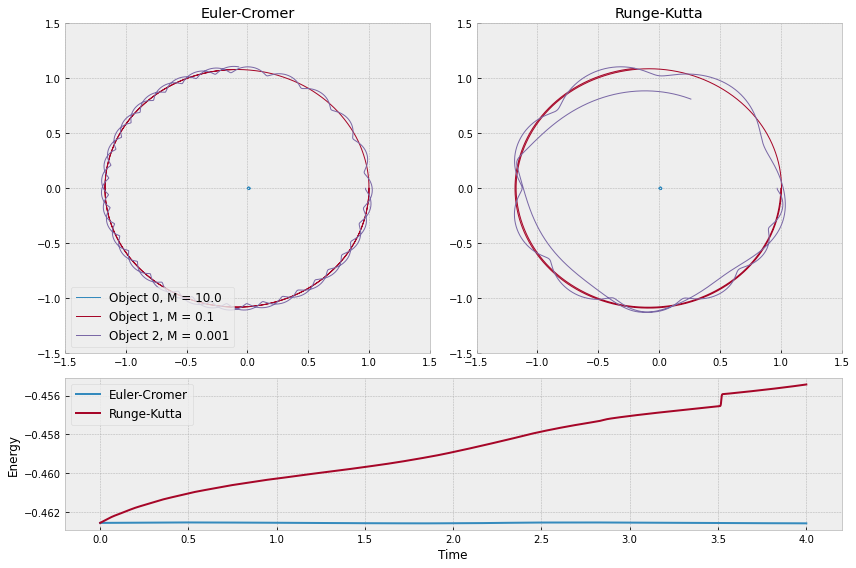

In [41]:
fig = plt.figure(tight_layout=True, figsize = (12,8))
gs = gridspec.GridSpec(3, 4)

ax0 = fig.add_subplot(gs[0:2, :2])
ax1 = fig.add_subplot(gs[0:2, 2:], sharex = ax0, sharey = ax0)
ax2 = fig.add_subplot(gs[2, :])

for i in range(len(M)):
    ax0.plot(X_EC[:,i,0], X_EC[:,i,1], lw = 1, label = f'Object {i}, M = {M[i]}')
    ax1.plot(X_RK[:,i,0], X_RK[:,i,1], lw = 1, label = f'Object {i}, M = {M[i]}')

times = np.linspace(0, Tmax, len(E_EC))
ax2.plot(times, E_EC, label = 'Euler-Cromer')
ax2.plot(times, E_RK, label = 'Runge-Kutta')


ax0.set_title('Euler-Cromer')
ax1.set_title('Runge-Kutta')
ax2.set_xlabel('Time')
ax2.set_ylabel('Energy')


ax0.legend(loc = 'lower left', fontsize = 12)
ax2.legend(fontsize = 12)

w = 1.5
ax0.set_xlim(-w, w)
ax0.set_ylim(-w, w)
plt.tight_layout()

# Example 11 - ODEs with discontinuities

In deriving different ODE methods, different assumptions about the right-hand side, $f(x, t)$ are made. For example, for the 4th-order Runge-Kutta method to actually be 4th-order accurate, it is required that the first four partial derivatives of $f(x, t)$ exist, and are continuous.

An example of an ODE where the right-hand side itself is continuous, but not its derivatives, is

$$ \dot{x} = |sin(\pi t)|, $$

which has discontinuous derivatives at $t \in [0, 1, 2, \ldots]$. We will integrate this equation on the interval $t \in [0, 2]$, with initial condition $x_0 = 0$, in which case the analytical solution is

$$ x(2) = \int_0^2 |sin(\pi t)| \, \mathrm{d}t = \frac{4}{\pi}. $$

We will do this for a range of different timesteps, and see how the error scales with the timestep.

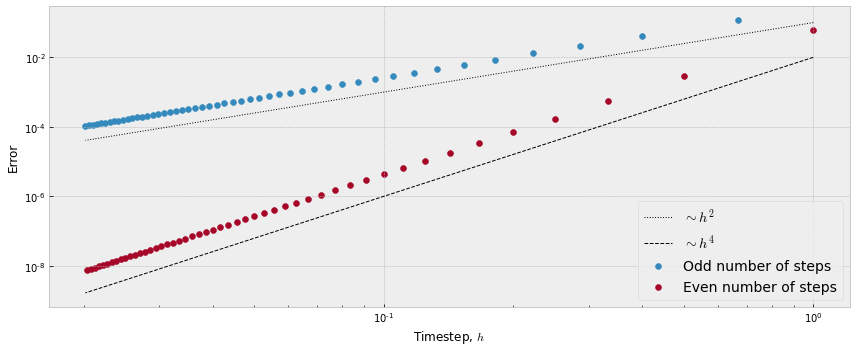

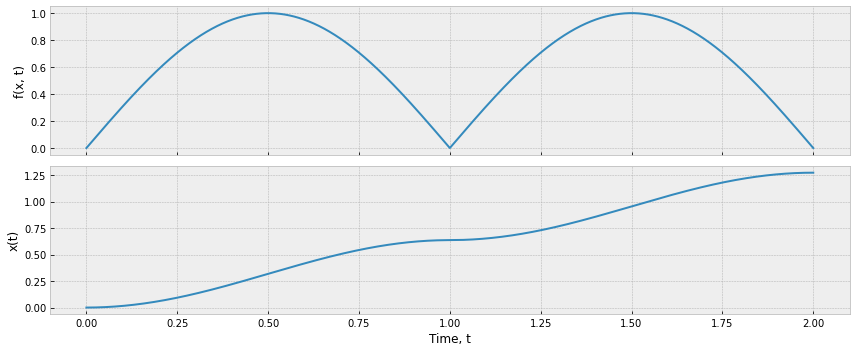

In [42]:
def f(x, t):
    return np.abs(np.sin(np.pi*t))

X0 = 0
T0 = 0
Tmax = 2
# Selecting a range of timesteps that divide Tmax
timesteps = Tmax / np.arange(2, 100)

exact = 4/np.pi
errors = np.zeros_like(timesteps)

for i, h in enumerate(timesteps):
    X, T = trajectory(X0, T0, Tmax, h, f, rk4)
    errors[i] = np.abs( X[-1] - exact)
    
fig = plt.figure(figsize = (12, 5))
plt.scatter(timesteps[1::2], errors[1::2], label = 'Odd number of steps')
plt.scatter(timesteps[::2], errors[::2], label = 'Even number of steps')
plt.plot(timesteps, 1e-1*timesteps**2, ':', lw = 1, c = 'k', label = '$\sim h^2$')
plt.plot(timesteps, 1e-2*timesteps**4, '--', lw = 1, c = 'k', label = '$\sim h^4$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.xlabel('Timestep, $h$')
plt.ylabel('Error')
plt.tight_layout()

# Plot f(x, t) and x(t) as well, for illustration
fig, ax = plt.subplots(nrows = 2, figsize = (12, 5), sharex = True)
h = 0.001
X, T = trajectory(X0, T0, Tmax, h, f, rk4)
ax[0].plot(T, f(X, T))
ax[1].plot(T, X)
ax[0].set_ylabel('f(x, t)')
ax[1].set_ylabel('x(t)')
ax[1].set_xlabel('Time, t')
plt.tight_layout()

## What is going on in the plot above?

For the 4th-order Runge-Kutta method, the error in each step (called the local error) is $\mathcal{O}(h^5)$. Since the number of steps is proportional to $1/h$, the error at the end (called the global error) adds up to be $\mathcal{O}(h^4)$.

The issue above is that the local error is only bounded by $\mathcal{O}(h^5)$ *if* the first four derivatives of $f(x, t)$ exist and are continuous. This is the case in all points, except at $t=1$. So if the integrator *steps across* the point $t=1$, it picks up a single local error that is not bounded by $\mathcal{O}(h^5)$. In fact, it appears to be only bounded by $\mathcal{O}(h^2)$. And that single local error is big enough to swamp the overall $\mathcal{O}(h^4)$ global error of the 4th-order Runge-Kutta method, leading to a global error that is only $\mathcal{O}(h^2)$.

For this particular example, with $t \in [0, 2]$, an odd number of steps leads the integrator to *step across* the discontinuity at $t=1$, while an even number of steps means that the integrator will *stop and restart* exactly at $t=1$. In the latter case, it does not "see" the discontinuity, and therefore the local error remains bounded by $\mathcal{O}(h^5)$, leading to an overall global error of $\mathcal{O}(h^4)$, as we would normally expect from a 4th-order method.

## Strategies for dealing with discontinuities:

* Ignore the discontinuity: use a variable-step method and a small tolerance, and hope that it works.
* Use specific ODE methods designed to detect discontinuities.
* Use information about the location of the discontinuity to stop and restart the integration at those points.

Adapted from Hairer, Nørsett & Wanner, see pp. 197-198 for details, http://link.springer.com/book/10.1007%2F978-3-540-78862-1



# Example 12 - Shooting method for boundary value problems

So far, we have looked at initial value problems. For example, for the stiff equation above, we had two variables, $x$ and $v$, each with their own initial value. An alternative situation is where you have values at two different points for one of the variables. A method for such problems is the shooting method, named for it's similarity to how one aims a cannon.

As an example, we will look at calculating a particle trajectory in gravity, with air resistance. A common expression for air resistance is that the force is given by

$$ \mathbf{F} = -\bigg( \frac{1}{2} \rho A C_D \bigg ) |\mathbf{v}| \mathbf{v}, $$

that is the force is proportional to $\mathbf{v}^2$, and has direction opposite to the velocity of the particle. All the terms inside the brackets can be treated as constants in the simplest case: $\rho$ is the density of air, $A$ is the cross sectional area of the projectile, and $C_D$ is a drag coefficient (usually empirically determined for anything more complicated than a sphere).

Treating everything inside the brackets as one consant, $A$, and including gravity, the resulting second-order ODE is

$$ \ddot{\mathbf{x}} = \mathbf{g} -A |\dot{\mathbf{x}}| \dot{\mathbf{x}}.$$

By using $\dot{\mathbf{x}} = \mathbf{v}$, we rewrite into a pair of first-order ODEs:

$$ \dot{\mathbf{x}} = \mathbf{v}, \\
 \dot{\mathbf{v}} = \mathbf{g} -A |\mathbf{x}| \mathbf{v}.$$


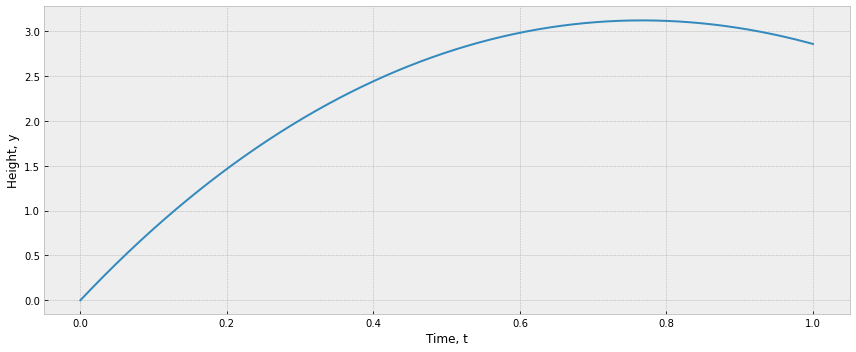

In [24]:
def f(X, t):
    # Here X is a four-component vector,
    # X = [x, y, vx, vy]
    A = 0.05 # combined drag coefficient, see above
    g = 9.81 # acceleration of gravity
    dx  = X[2]
    dy  = X[3]
    dvx = -A*np.sqrt(X[2]**2 + X[3]**2) * X[2]
    dvy = -g -A*np.sqrt(X[2]**2 + X[3]**2) * X[3]
    return np.array([dx, dy, dvx, dvy])

# Integration time
T0 = 0
Tmax = 1
h = 0.001
# Initial conditions, speed and angle
v0 = 10
theta = 60
X0 = np.array([0, 0, v0*np.cos(np.radians(theta)), v0*np.sin(np.radians(theta))])

X, T = trajectory(X0, T0, Tmax, h, f, rk4)

fig = plt.figure(figsize = (12, 5))
plt.plot(T, X[:,1])
plt.ylabel('Height, y')
plt.xlabel('Time, t')
plt.tight_layout()

### Boundary values

Assume now that instead of having both position and velocity at $t = 0$, we instead have position both at time $t=0$, and time $t = T_{max}$. Then we have a boundary value problem, that we can solve iteratively.

For simplicity, we consider only motion in the $y$ direction, making the problem 2D $(y, t)$.

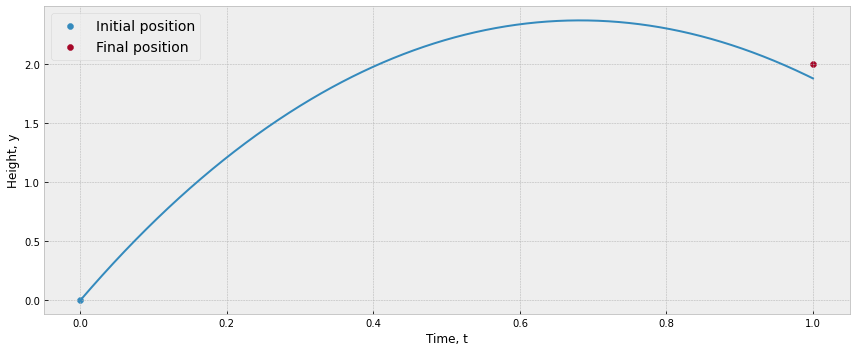

In [25]:
# Initial position
y_start = 0
# Final position
y_end = 2


# Integration time
T0 = 0
Tmax = 1
h = 0.001
# Initial conditions, speed and angle
v0 = 7.25
theta = 90
X0 = np.array([0, 0, v0*np.cos(np.radians(theta)), v0*np.sin(np.radians(theta))])

X, T = trajectory(X0, T0, Tmax, h, f, rk4)

fig = plt.figure(figsize = (12, 5))
# Plot initial and final positions for illustration
plt.scatter(T0, y_start, label = 'Initial position')
plt.scatter(Tmax, y_end, label = 'Final position')
plt.plot(T, X[:,1])
plt.ylabel('Height, y')
plt.xlabel('Time, t')
plt.legend(fontsize = 14)
plt.tight_layout()

### Implementing bisection method to find solution

Iteration 1, error is -0.08811
Iteration 2, error is 0.96194
Iteration 3, error is 0.43151
Iteration 4, error is 0.17032
Iteration 5, error is 0.04076
Iteration 6, error is -0.02376
Iteration 7, error is 0.00848
Iteration 8, error is -0.00765
Iteration 9, error is 0.00041


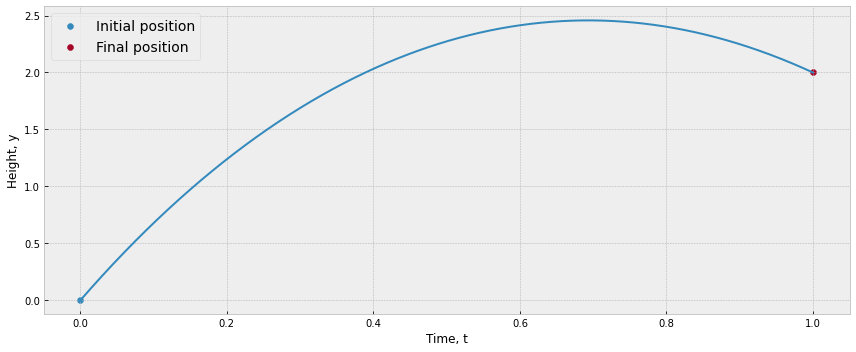

In [26]:
def bisection_method(y_start, y_end, T0, Tmax, f, a, b, h = Tmax / 1000, tol = 1e-3, maxiter = 100):
    # Initial vector, setting both position and speed in x-direction to 0
    # for this 2D example (y, t)
    
    # Define an interval, [a, b]
    # where the results (y_end - x) must have opposite sign
    X0a = np.array([0, y_start, 0, a])
    Xa, T = trajectory(X0a, T0, Tmax, h, f, rk4)
    X0b = np.array([0, y_start, 0, b])
    Xb, T = trajectory(X0b, T0, Tmax, h, f, rk4)
    
    # Calculate midpoint
    c = (a + b) / 2
    X0c = np.array([0, y_start, 0, c])
    Xc, T = trajectory(X0c, T0, Tmax, h, f, rk4)
    err = y_end - Xc[-1, 1]
    
    # iterate until tolerance error is below tolerance
    i = 0 # iteration counter
    while np.abs(err) > tol:
        i += 1
        if i > maxiter:
            print('Failed to converge')
            return Xc, T, c
        if ((y_end - Xc[-1, 1]) * (y_end - Xa[-1, 1])) < 0:
            # a and c yield opposite signs, continue with those
            b = c
            Xb = Xc.copy()
        else:
            # b and c yield opposite signs, continue with those
            a = c
            Xa = Xc.copy()
            
        # Calculate midpoint
        c = (a + b) / 2
        X0c = np.array([0, y_start, 0, c])
        Xc, T = trajectory(X0c, T0, Tmax, h, f, rk4)
        err = y_end - Xc[-1,1]
        print(f'Iteration {i}, error is {err:.5f}')
    return Xc, T, c
        

# Initial position
y_start = 0
# Final position
y_end = 2

# Integration time
T0 = 0
Tmax = 1

# Two initial guesses
a = 0
b = 10

X, T, v0 = bisection_method(y_start, y_end, T0, Tmax, f, a, b)

fig = plt.figure(figsize = (12, 5))
# Plot initial and final positions for illustration
plt.scatter(T0, y_start, label = 'Initial position')
plt.scatter(Tmax, y_end, label = 'Final position')
plt.plot(T, X[:,1])
plt.ylabel('Height, y')
plt.xlabel('Time, t')
plt.legend(fontsize = 14)
plt.tight_layout()

# Example 13 - Scipy.integrate.odeint
## (which is in practice a wrapper for lsoda)
### (which is written in fortran)

In practice, the best approach to numerical integration of ODEs is often to use code written by someone else. A useful example is `scipy.integrate.odeint`. This is a python wrapper to a fortran library called odepack, and specifically to the solver called lsoda. For more information, have a look at the scipy documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

This particular solver uses dynamic timestep, and will automatically switch to an implicit solver if it detects a stiff equation.

Below, we try it out on the equation from case 2 above.

Things to try:
* Compare number of steps to the smallest number needed by Euler or 4th-order Runge-Kutta

## Applying odeint to stiff problem

Number of steps:  38
Average stepsize:  0.13157894736842105


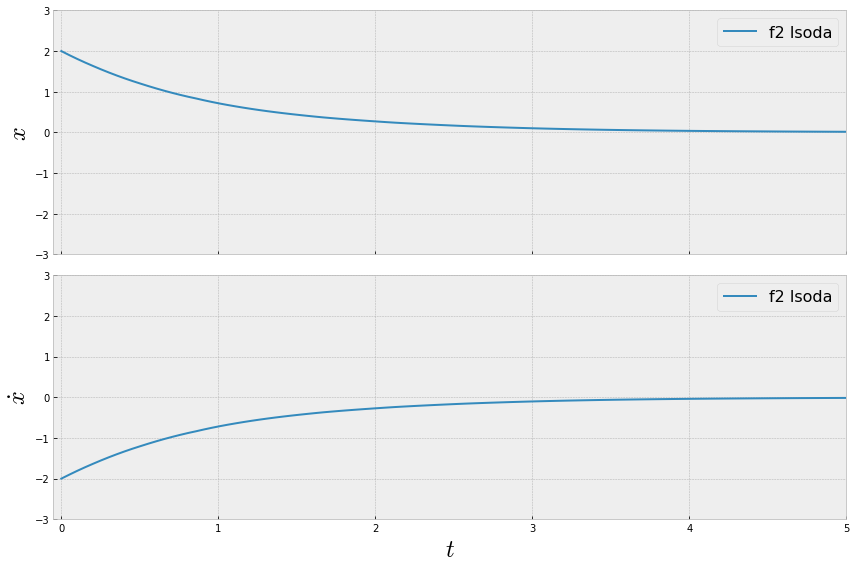

In [27]:
from scipy.integrate import odeint

def v(x):
    return -x

def f2(X, t):
    # x_1 = x
    # x_2 = xdot
    alpha = 1e3
    dX = np.zeros(2)
    dX[0] = X[1]
    dX[1] = alpha*(v(X[0]) - X[1])
    return dX

# Initial conditions for f2
x02  = np.array([2, -2])
t0   = 0
Tmax = 5
# We need to specify a list of times where we want the solution,
# these are calculated via dense output, as we saw above
times = np.linspace(t0, Tmax, 100)
# Calculate trajectories
X2_lsoda, infodict = odeint(f2, x02, times, full_output = True, rtol = 1e-2, atol = 1e-2)

print('Number of steps: ', infodict['nst'][-1])
print('Average stepsize: ', Tmax / infodict['nst'][-1])

# Make a figure with two subplots
fig, ax = plt.subplots(nrows = 2, sharex = True, figsize = (12,8))

# Plot numerical solutions of position
ax[0].plot(times, X2_lsoda[:,0], label = 'f2 lsoda')

# Plot numerical solutions of velocity
ax[1].plot(times, X2_lsoda[:,1], label = 'f2 lsoda')

# Labels
ax[0].set_ylabel('$x$', fontsize = 24)
ax[1].set_ylabel('$\dot{x}$', fontsize = 24)
ax[1].set_xlabel('$t$', fontsize = 24)
# Add legend
ax[0].legend(fontsize = 16)
ax[1].legend(fontsize = 16)
# Plot limits
ax[0].set_ylim(-3, 3)
ax[1].set_ylim(-3, 3)
ax[1].set_xlim(-0.05, 5)
# Reduce whitespace
plt.tight_layout()

# Applying odeint to reduced three-body problem

Number of steps:  1182
Average stepsize:  0.004230118443316413
Simulation took  0.02158212661743164  seconds


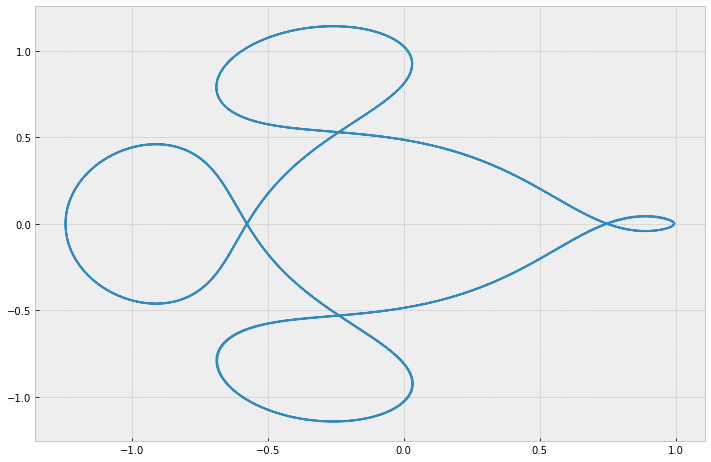

In [28]:
def fa(X, t):
    # Example taken from beginning of Chapter II in
    # Hairer, Nørsett, Wanner
    # Solving Ordinary Differential Equations, vol I
    # X[0] = y1
    # X[1] = y1dot
    # X[2] = y2
    # X[3] = y2dot
    # Constants
    mu  = 0.012277471
    mu_ = 1 - mu
    # Variable parameters
    D1 = ((X[0] + mu )**2 + X[2]**2)**(3/2)
    D2 = ((X[0] - mu_)**2 + X[2]**2)**(3/2)
    # Derivatives
    dX0 = X[1]
    dX1 = X[0] + 2*X[3] - mu_*(X[0] + mu)/D1 - mu*(X[0] - mu_)/D2
    dX2 = X[3]
    dX3 = X[2] - 2*X[1] - mu_*X[2]/D1        - mu*X[2]/D2
    return np.array([dX0, dX1, dX2, dX3])
    
    
t  = 0
T  = 17.06521656015796
X0 = np.array([
         0.994, # y1(0)
         0.0,   # y1'(0)
         0.0,   # y2(0)
        -2.001585106379082522405 # y2'(0)
    ])

# We need to specify a list of times where we want the solution,
# these are calculated via dense output, as we saw above
times = np.linspace(0, 2*T, 10000)
# Calculate trajectories
tic = time()
X_lsoda, infodict = odeint(fa, X0, times, full_output = True,)
toc = time()

print('Number of steps: ', infodict['nst'][-1])
print('Average stepsize: ', Tmax / infodict['nst'][-1])
print('Simulation took ', toc - tic, ' seconds')

fig = plt.figure(figsize = (12, 8))
plt.plot(X_lsoda[:,0], X_lsoda[:,2])

## Applying odeint to system with discontinuity

According to the documentation for odeint, we can supply a list of times where there are discontinuities:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

## Without information about discontinuities ##
Number of steps:  2224
Average stepsize: 0.00899
Simulation took:  0.01325 seconds
Error in result:  1.63016e-11

## With information about discontinuities ##
Number of steps:  1885
Average stepsize: 0.01061
Simulation took:  0.01050 seconds
Error in result:  2.02736e-11


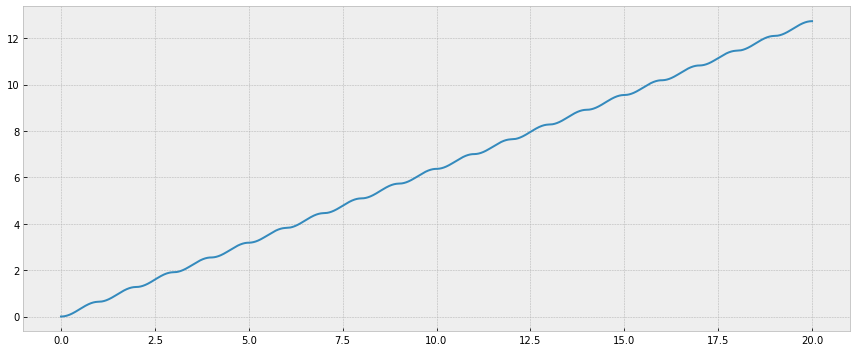

In [29]:
def f(x, t):
    return np.abs(np.sin(np.pi*t))

X0 = 0
Tmax = 20
atol = 1e-13
rtol = 1e-13

# We need to specify a list of times where we want the solution,
# these are calculated via dense output, as we saw above
times = np.linspace(0, Tmax, 10001)

# Calculate trajectories
tic = time()
X_lsoda, infodict = odeint(f, X0, times, full_output = True, atol = atol, rtol = rtol)
toc = time()

print('## Without information about discontinuities ##')
print(f'Number of steps:  {infodict["nst"][-1]}')
print(f'Average stepsize: {Tmax / infodict["nst"][-1]:.5f}')
print(f'Simulation took:  {toc - tic:.5f} seconds')
print(f'Error in result:  {np.abs(X_lsoda[-1] - 40/np.pi)[0]:.5e}')
print()

# Calculate trajectories again, using information about location of discontinuities
# List of "critical times", in this case all integer values of t
tcrit = np.arange(20)
tic = time()
X_lsoda, infodict = odeint(f, X0, times, full_output = True, tcrit = tcrit, atol = atol, rtol = rtol)
toc = time()

print('## With information about discontinuities ##')
print(f'Number of steps:  {infodict["nst"][-1]}')
print(f'Average stepsize: {Tmax / infodict["nst"][-1]:.5f}')
print(f'Simulation took:  {toc - tic:.5f} seconds')
print(f'Error in result:  {np.abs(X_lsoda[-1] - 40/np.pi)[0]:.5e}')


fig = plt.figure(figsize = (12, 5))
plt.plot(times, X_lsoda)
plt.tight_layout()